In [4]:
from utils import get_meta
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import cv2
%matplotlib inline
from tqdm import tqdm
from sklearn.cross_validation import train_test_split

from tflearn.data_utils import shuffle, to_categorical
from tflearn.data_preprocessing import ImagePreprocessing
from tflearn.data_augmentation import ImageAugmentation

plt.style.use('ggplot')


In [48]:
db='wiki'
mat_path='/home/ashish/Desktop/age-and-gender/data/wiki_crop/wiki.mat'
# mat_path='/data/wiki_crop/wiki.mat'
full_path, dob, gender, photo_taken, face_score, second_face_score, age= get_meta(mat_path, db)

temp_dataframe={"full_path":full_path,'gender':gender,'face_score':face_score,'second_face_score':second_face_score,'age':age}
df=pd.DataFrame(temp_dataframe)
print(df.head())
train_dir='/home/ashish/Desktop/age-and-gender/data/wiki_crop/'
# train_dir='/data/wiki_crop/'

img_size=32
LR=1e-3
model_name='ageandgender-{}-{}.model'.format(LR,'3conv')


   age  face_score                          full_path  gender  \
0   28    4.300962  [17/10000217_1981-05-05_2009.jpg]     1.0   
1   39    2.645639  [48/10000548_1925-04-04_1964.jpg]     1.0   
2   59    4.329329    [12/100012_1948-07-03_2008.jpg]     1.0   
3   31        -inf  [65/10001965_1930-05-23_1961.jpg]     1.0   
4   41    3.408442  [16/10002116_1971-05-31_2012.jpg]     0.0   

   second_face_score  
0                NaN  
1           1.949248  
2                NaN  
3                NaN  
4                NaN  


In [7]:
path=[]
type(df.full_path)
for i in df.full_path:
    i=str(i)[2:-2]
    path.append(os.path.join(train_dir,str(i)))
print(path[:10]) 

['/home/ashish/Desktop/age-and-gender/data/wiki_crop/17/10000217_1981-05-05_2009.jpg', '/home/ashish/Desktop/age-and-gender/data/wiki_crop/48/10000548_1925-04-04_1964.jpg', '/home/ashish/Desktop/age-and-gender/data/wiki_crop/12/100012_1948-07-03_2008.jpg', '/home/ashish/Desktop/age-and-gender/data/wiki_crop/65/10001965_1930-05-23_1961.jpg', '/home/ashish/Desktop/age-and-gender/data/wiki_crop/16/10002116_1971-05-31_2012.jpg', '/home/ashish/Desktop/age-and-gender/data/wiki_crop/02/10002702_1960-11-09_2012.jpg', '/home/ashish/Desktop/age-and-gender/data/wiki_crop/41/10003541_1937-09-27_1971.jpg', '/home/ashish/Desktop/age-and-gender/data/wiki_crop/39/100039_1904-12-07_1982.jpg', '/home/ashish/Desktop/age-and-gender/data/wiki_crop/13/10004113_1946-08-26_2007.jpg', '/home/ashish/Desktop/age-and-gender/data/wiki_crop/22/10004122_1982-03-17_2011.jpg']


In [8]:
df.full_path=path
df.head()

,age,face_score,full_path,gender,second_face_score
0,28,4.300962,/home/ashish/Desktop/age-and-gender/data/wiki_...,1.0,NaN
1,39,2.645639,/home/ashish/Desktop/age-and-gender/data/wiki_...,1.0,1.949248
2,59,4.329329,/home/ashish/Desktop/age-and-gender/data/wiki_...,1.0,NaN
3,31,-inf,/home/ashish/Desktop/age-and-gender/data/wiki_...,1.0,NaN
4,41,3.408442,/home/ashish/Desktop/age-and-gender/data/wiki_...,0.0,NaN


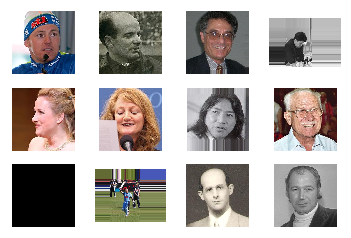

In [9]:
def show_images(path):
    fig=plt.figure()
    for num, img_no in enumerate(path[:12]):
        y=fig.add_subplot(3,4,num+1)
        img=cv2.imread(img_no,3)
        y.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        y.axes.get_xaxis().set_visible(False)
        y.axes.get_yaxis().set_visible(False)

    
show_images(path) 

In [10]:
print(df.head())
print(df.isnull().values.any())
print(df.gender.isnull().sum())
df.drop(df[df.gender.isnull()==True].index,inplace=True)
print(df.gender.isnull().sum())
print(df.head())
df[df.face_score<0]=np.nan
df.drop(df[df.face_score.isnull()==True].index,inplace=True)
print(df.head())

   age  face_score                                          full_path  gender  \
0   28    4.300962  /home/ashish/Desktop/age-and-gender/data/wiki_...     1.0   
1   39    2.645639  /home/ashish/Desktop/age-and-gender/data/wiki_...     1.0   
2   59    4.329329  /home/ashish/Desktop/age-and-gender/data/wiki_...     1.0   
3   31        -inf  /home/ashish/Desktop/age-and-gender/data/wiki_...     1.0   
4   41    3.408442  /home/ashish/Desktop/age-and-gender/data/wiki_...     0.0   

   second_face_score  
0                NaN  
1           1.949248  
2                NaN  
3                NaN  
4                NaN  
True
2643
0
   age  face_score                                          full_path  gender  \
0   28    4.300962  /home/ashish/Desktop/age-and-gender/data/wiki_...     1.0   
1   39    2.645639  /home/ashish/Desktop/age-and-gender/data/wiki_...     1.0   
2   59    4.329329  /home/ashish/Desktop/age-and-gender/data/wiki_...     1.0   
3   31        -inf  /home/ashish/Deskto

<function matplotlib.pyplot.plot>

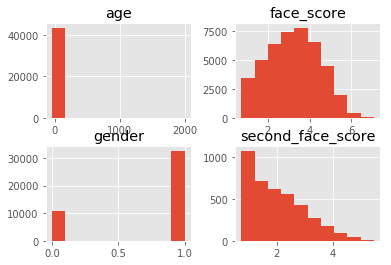

In [11]:
df.hist()
plt.plot

In [14]:
data_0=(df.full_path[df.gender==0])[:10000]
data_1=shuffle(df.full_path[df.gender==1])
data_1=data_1[0][:10000]

In [15]:
print(len(data_0))
print(len(data_1))

n_files=len(data_0)+len(data_1)
print(n_files)

allX = np.zeros((n_files, img_size, img_size, 3), dtype='float64')
ally = np.zeros(n_files)
count=0

for f in tqdm(data_0):
    img=cv2.imread(f,1)
    img=cv2.resize(img,(img_size,img_size))
    allX[count]=np.array(img)
    ally[count]=0
    count+=1
    
for f in tqdm(data_1):
    img=cv2.imread(f,1)
    img=cv2.resize(img,(img_size,img_size))
    allX[count]=np.array(img)
    ally[count]=1
    count+=1


  1%|          | 117/10000 [00:00<00:08, 1162.03it/s]

10000
10000
20000


100%|██████████| 10000/10000 [02:13<00:00, 74.75it/s]


In [16]:
print(np.shape(allX))
print(np.shape(ally))

(20000, 32, 32, 3)
(20000,)


In [17]:
allX,ally=shuffle(allX,ally)
X, X_test, Y, Y_test = train_test_split(allX, ally, test_size=0.2, random_state=42)
X, Y = shuffle(X, Y) 
Y = to_categorical(Y, 2)
Y_test = to_categorical(Y_test, 2)

print(np.shape(X))
print(type(X))
print(np.shape(Y))
# print(X[:10])

(16000, 32, 32, 3)
<class 'numpy.ndarray'>
(16000, 2)


In [18]:
img_prep = ImagePreprocessing()
img_prep.add_featurewise_zero_center()
img_prep.add_featurewise_stdnorm()

# Create extra synthetic training data by flipping & rotating images
img_aug = ImageAugmentation()
img_aug.add_random_flip_leftright()
img_aug.add_random_rotation(max_angle=25.)

In [49]:
###################################
# Define network architecture
###################################
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
from tflearn.metrics import Accuracy
from tflearn.layers.normalization import local_response_normalization
# Input is a 32x32 image with 3 color channels (red, green and blue)
network = input_data(shape=[None, img_size, img_size, 3],
                     data_preprocessing=img_prep,
                     data_augmentation=img_aug,name='')


# network = input_data(shape=[None, img_size, img_size, 3],name='input')

# 1: Convolution layer with 32 filters, each 3x3x3
conv_1 = conv_2d(network, 32, 3, activation='relu', name='conv_1')

# 2: Max pooling layer
network = max_pool_2d(conv_1, 2)

network=local_response_normalization(network)

# 3: Convolution layer with 64 filters
conv_2 = conv_2d(network, 64, 3, activation='relu', name='conv_2')


network = max_pool_2d(conv_2, 2)

network=local_response_normalization(network)


# 4: Convolution layer with 64 filters
conv_3 = conv_2d(network, 64, 3, activation='relu', name='conv_3')

# 5: Max pooling layer
network = max_pool_2d(conv_3, 2)

network=local_response_normalization(network)

# 6: Fully-connected 512 node layer
network = fully_connected(network, 512, activation='relu')
network = fully_connected(network, 512, activation='relu')

# 7: Dropout layer to combat overfitting
network = dropout(network, 0.5)

# 8: Fully-connected layer with two outputs
network = fully_connected(network, 2, activation='softmax')

# Configure how the network will be trained
acc = Accuracy(name="Accuracy")
network = regression(network, optimizer='adam',
                     loss='categorical_crossentropy',
                     learning_rate=0.0005, metric=acc)

# Wrap the network in a model object
model = tflearn.DNN(network,tensorboard_verbose = 3, tensorboard_dir='tmp/tflearn_logs/')

###################################
# Train model for 100 epochs
###################################
model.fit(X, Y, validation_set=(X_test, Y_test), batch_size=500,
      n_epoch=20, run_id=model_name, show_metric=True)

model.save(model_name)


IndexError: list index out of range

In [22]:
import glob
test_path=np.sort(glob.glob('/home/ashish/Desktop/age-and-gender/data/test/*.jpg'))

In [45]:
model.load(model_name)


INFO:tensorflow:Restoring parameters from /home/ashish/Desktop/age-and-gender/code/ageandgender-0.001-2conv_basic.model


INFO:tensorflow:Restoring parameters from /home/ashish/Desktop/age-and-gender/code/ageandgender-0.001-2conv_basic.model


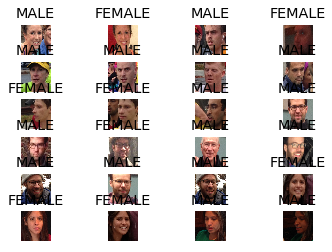

In [47]:
import matplotlib.pyplot as plt
fig=plt.figure()

for num, i in  enumerate(test_path[:24]):
    
    y = fig.add_subplot(6,4,num+1)
    img=cv2.imread(i,1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    img=cv2.resize(img,(img_size,img_size))
    
    img=img.reshape(1,img_size,img_size,3)
    img=img.astype(float)

    model_out=model.predict(img)[0][0]
#     print(model_out)
    if (model_out)>.5:
        str_label='FEMALE'
#         print("FEMALE")

    elif (model_out)<0.5:
        str_label='MALE'
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
#     print(model_out)
    
# plt.show()


In [ ]:
# import matplotlib.pyplot as plt
# fig=plt.figure()

# for num, i in  enumerate(test_path[:24]):
    

#     img=cv2.imread(i,1)
#     img=cv2.resize(img,(img_size,img_size))
#     plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

#     img=img.reshape(1,img_size,img_size,3)
#     img=img.astype(float)

#     model_out=model.predict(img)[0][0]
# #     print(model_out)
#     if (model_out)>.5:
#         str_label='FEMALE'
# #         print("FEMALE")

#     elif (model_out)<0.5:
#         str_label='MALE'
#     plt.title(str_label)
#     y.axes.get_xaxis().set_visible(False)
#     y.axes.get_yaxis().set_visible(False)
# #     print(model_out)
    
# # plt.show()


# for i in test_path[:24]:
    